### Introduction to Neural network classification with Tensorflow
In this notebook we are going to learn how to write neural networks for classification.

A classification is where you try to classify something as one thing or other.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_sample = 1000

# Create circles
X, y = make_circles(n_sample, noise=0.03,random_state=42)

In [3]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

our data is little hard to understamd right now.. let's visualize it

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0],"X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


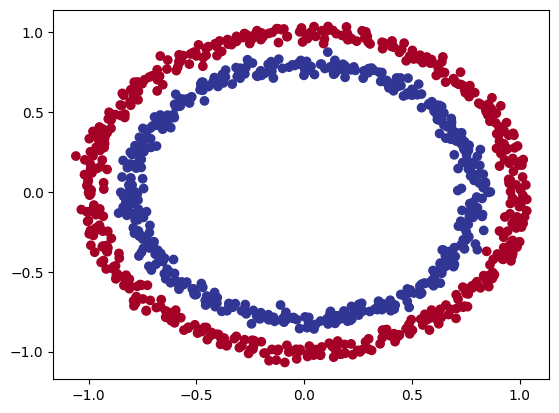

In [6]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Input and output shape

In [7]:
# Check the shapes of your features and labels
X.shape, y.shape

((1000, 2), (1000,))

### Steps in modelling
The steps in modelling with tensorflow are typically:
* Create or import model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak
* Evaluate

In [8]:
import tensorflow as tf
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 858us/step - loss: 2.2586 - accuracy: 0.4700
Epoch 2/5
32/32 [==============================] - 0s 760us/step - loss: 0.7405 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7074 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 715us/step - loss: 0.6982 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 711us/step - loss: 0.6956 - accuracy: 0.4960


In [9]:
# Let's try and improve our model by training for longer period
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 677us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy.... it's performing as if it's guessing.
So let's step things up a notch and add an extra layer.

In [10]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 645us/step - loss: 0.6934 - accuracy: 0.5000


[0.6933510303497314, 0.5]

### Improving our model
Let's look into our bag of tricks to see how we can improve our model.

* Create a model - We might add more layers or increase the number of neurons within a layer.
* Compiling a model - We might choose different optimization function such as Adam instead of SGD.
* Fitting a model - Perhaps we might fit our model for more epochs(leave it training for longer periods).

In [11]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 682us/step - loss: 0.6987 - accuracy: 0.5090


[0.6987237930297852, 0.5090000033378601]

### To visualize our model's prediction, let's create a function `plo_decision_boundary()` this function will:

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the differnet X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as a line between zones (where each unique class falls)

In [12]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)

    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions

    y_pred = model.predict(x_in)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")

        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.around(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 510us/step
doing binary classification


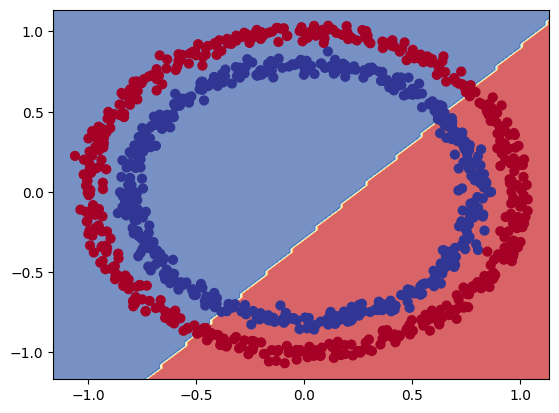

In [13]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

### The missing piece Non-linearity

In [14]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100, verbose=2)
model_4.evaluate(X, y)

Epoch 1/100
32/32 - 0s - loss: 4.7615 - accuracy: 0.4780 - 314ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 4.6932 - accuracy: 0.4770 - 17ms/epoch - 522us/step
Epoch 3/100
32/32 - 0s - loss: 4.6475 - accuracy: 0.4760 - 18ms/epoch - 553us/step
Epoch 4/100
32/32 - 0s - loss: 4.5960 - accuracy: 0.4740 - 17ms/epoch - 519us/step
Epoch 5/100
32/32 - 0s - loss: 4.5628 - accuracy: 0.4730 - 34ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 4.5446 - accuracy: 0.4730 - 17ms/epoch - 525us/step
Epoch 7/100
32/32 - 0s - loss: 4.4860 - accuracy: 0.4730 - 17ms/epoch - 518us/step
Epoch 8/100
32/32 - 0s - loss: 4.4751 - accuracy: 0.4700 - 33ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 4.4445 - accuracy: 0.4710 - 26ms/epoch - 803us/step
Epoch 10/100
32/32 - 0s - loss: 4.4341 - accuracy: 0.4700 - 10ms/epoch - 314us/step
Epoch 11/100
32/32 - 0s - loss: 4.4297 - accuracy: 0.4710 - 29ms/epoch - 902us/step
Epoch 12/100
32/32 - 0s - loss: 4.4267 - accuracy: 0.4710 - 17ms/epoch - 520us/step
Epoch

[3.93403959274292, 0.4690000116825104]

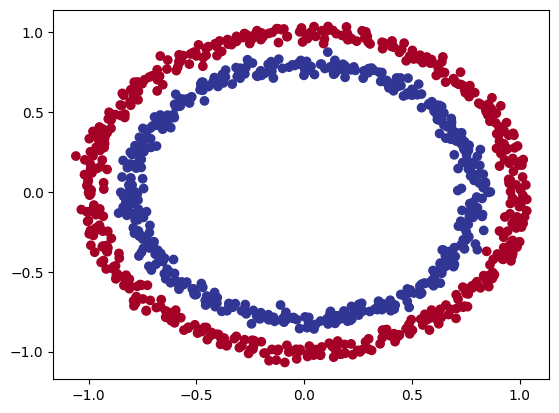

In [15]:
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 523us/step
doing binary classification


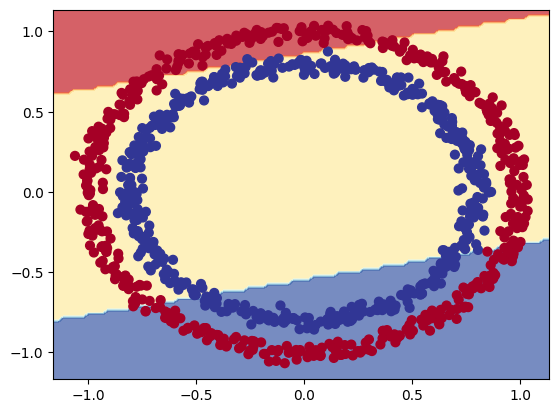

In [16]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_4,X=X, y=y)

Let's try to build our first neural network with a non-linear activation function.

In [17]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear activation function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=2)
model_5.evaluate(X, y)

Epoch 1/100
32/32 - 0s - loss: 4.3759 - accuracy: 0.4710 - 316ms/epoch - 10ms/step
Epoch 2/100
32/32 - 0s - loss: 4.3590 - accuracy: 0.4710 - 32ms/epoch - 991us/step
Epoch 3/100
32/32 - 0s - loss: 4.3259 - accuracy: 0.4680 - 17ms/epoch - 521us/step
Epoch 4/100
32/32 - 0s - loss: 4.2521 - accuracy: 0.4720 - 17ms/epoch - 520us/step
Epoch 5/100
32/32 - 0s - loss: 4.1770 - accuracy: 0.4730 - 35ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 4.1387 - accuracy: 0.4720 - 15ms/epoch - 466us/step
Epoch 7/100
32/32 - 0s - loss: 4.0949 - accuracy: 0.4740 - 34ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 4.0915 - accuracy: 0.4740 - 35ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 4.0883 - accuracy: 0.4740 - 30ms/epoch - 933us/step
Epoch 10/100
32/32 - 0s - loss: 4.0854 - accuracy: 0.4720 - 17ms/epoch - 536us/step
Epoch 11/100
32/32 - 0s - loss: 4.0736 - accuracy: 0.4710 - 16ms/epoch - 498us/step
Epoch 12/100
32/32 - 0s - loss: 4.0495 - accuracy: 0.4710 - 33ms/epoch - 1ms/step
Epoch 13/

[0.7908506989479065, 0.41200000047683716]

313/313 [==============================] - 0s 573us/step
doing binary classification


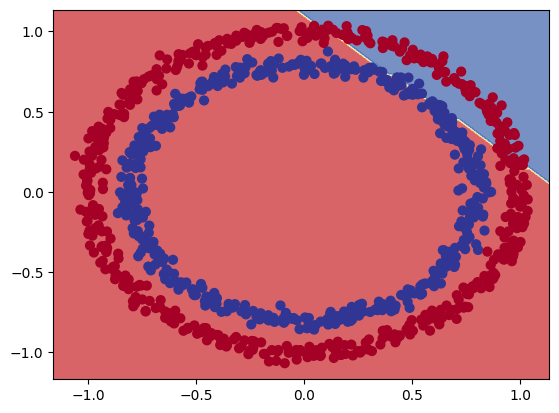

In [18]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_5,X=X, y=y)

In [19]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear activation function
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250, verbose=2)
model_6.evaluate(X, y)

Epoch 1/250
32/32 - 1s - loss: 1.3608 - accuracy: 0.4990 - 610ms/epoch - 19ms/step
Epoch 2/250
32/32 - 0s - loss: 1.0427 - accuracy: 0.3960 - 43ms/epoch - 1ms/step
Epoch 3/250
32/32 - 0s - loss: 0.9667 - accuracy: 0.3790 - 30ms/epoch - 933us/step
Epoch 4/250
32/32 - 0s - loss: 0.9158 - accuracy: 0.3700 - 23ms/epoch - 716us/step
Epoch 5/250
32/32 - 0s - loss: 0.8761 - accuracy: 0.3360 - 14ms/epoch - 438us/step
Epoch 6/250
32/32 - 0s - loss: 0.8436 - accuracy: 0.3150 - 40ms/epoch - 1ms/step
Epoch 7/250
32/32 - 0s - loss: 0.8186 - accuracy: 0.3210 - 23ms/epoch - 720us/step
Epoch 8/250
32/32 - 0s - loss: 0.7968 - accuracy: 0.3070 - 22ms/epoch - 703us/step
Epoch 9/250
32/32 - 0s - loss: 0.7795 - accuracy: 0.3230 - 22ms/epoch - 701us/step
Epoch 10/250
32/32 - 0s - loss: 0.7641 - accuracy: 0.3640 - 24ms/epoch - 741us/step
Epoch 11/250
32/32 - 0s - loss: 0.7477 - accuracy: 0.3960 - 23ms/epoch - 704us/step
Epoch 12/250
32/32 - 0s - loss: 0.7312 - accuracy: 0.4380 - 23ms/epoch - 729us/step
Epoch

[0.34552398324012756, 0.8100000023841858]

 87/313 [=======>......................] - ETA: 0s 

313/313 [==============================] - 0s 576us/step
doing binary classification


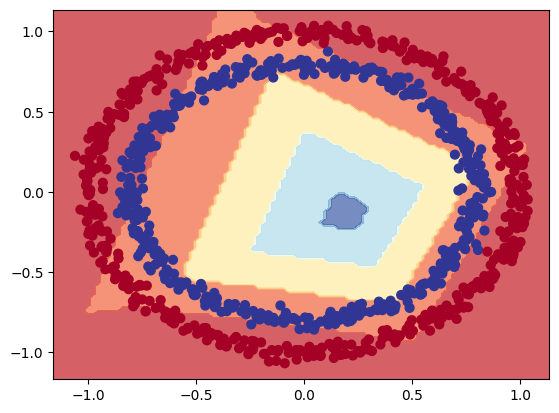

In [20]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_6,X=X, y=y)

In [21]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model with non-linear activation function
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100, verbose=2)
model_7.evaluate(X, y)

Epoch 1/100
32/32 - 1s - loss: 0.6971 - accuracy: 0.5100 - 509ms/epoch - 16ms/step
Epoch 2/100
32/32 - 0s - loss: 0.6885 - accuracy: 0.5480 - 23ms/epoch - 730us/step
Epoch 3/100
32/32 - 0s - loss: 0.6844 - accuracy: 0.5180 - 23ms/epoch - 713us/step
Epoch 4/100
32/32 - 0s - loss: 0.6825 - accuracy: 0.5150 - 22ms/epoch - 687us/step
Epoch 5/100
32/32 - 0s - loss: 0.6811 - accuracy: 0.5210 - 23ms/epoch - 715us/step
Epoch 6/100
32/32 - 0s - loss: 0.6797 - accuracy: 0.5250 - 23ms/epoch - 707us/step
Epoch 7/100
32/32 - 0s - loss: 0.6782 - accuracy: 0.5590 - 23ms/epoch - 719us/step
Epoch 8/100
32/32 - 0s - loss: 0.6771 - accuracy: 0.5790 - 22ms/epoch - 688us/step
Epoch 9/100
32/32 - 0s - loss: 0.6757 - accuracy: 0.5650 - 22ms/epoch - 688us/step
Epoch 10/100
32/32 - 0s - loss: 0.6744 - accuracy: 0.5730 - 23ms/epoch - 705us/step
Epoch 11/100
32/32 - 0s - loss: 0.6731 - accuracy: 0.5970 - 24ms/epoch - 765us/step
Epoch 12/100
32/32 - 0s - loss: 0.6718 - accuracy: 0.6330 - 24ms/epoch - 738us/step
E

[0.20062914490699768, 0.9879999756813049]

  1/313 [..............................] - ETA: 11s

313/313 [==============================] - 0s 571us/step
doing binary classification


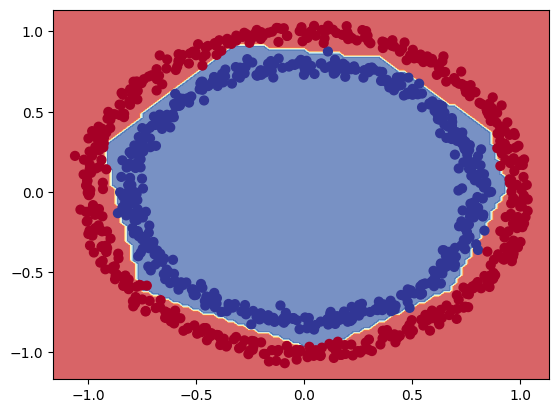

In [22]:
# Check the decision boundary for our latest boundary
plot_decision_boundary(model=model_7,X=X, y=y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

> 🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

> 🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [23]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

How does this look?

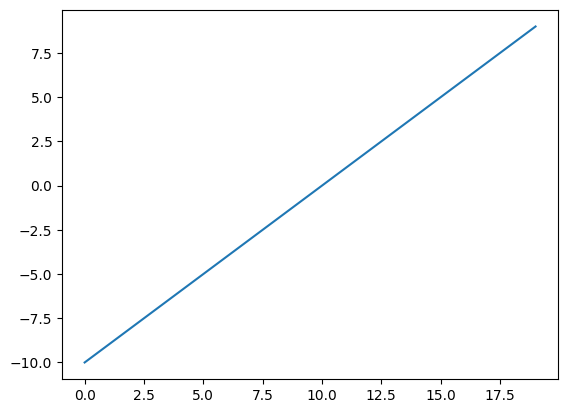

In [24]:
# Visualize our toy tensor
plt.plot(A)

A straight (linear) line!

Nice, now let's recreate the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) and see what it does to our data. You can also find a pre-built sigmoid function at [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid).

In [25]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

And how does it look?

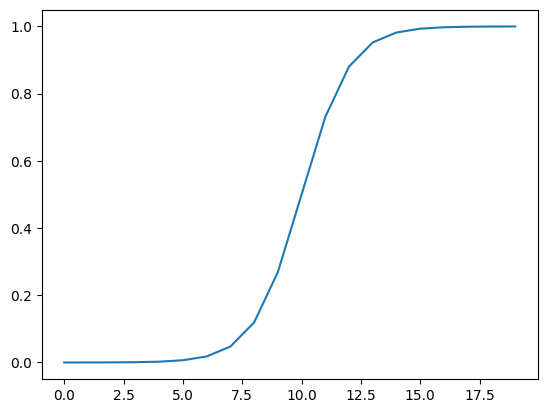

In [26]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A))

In [27]:
# Let's recreate relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

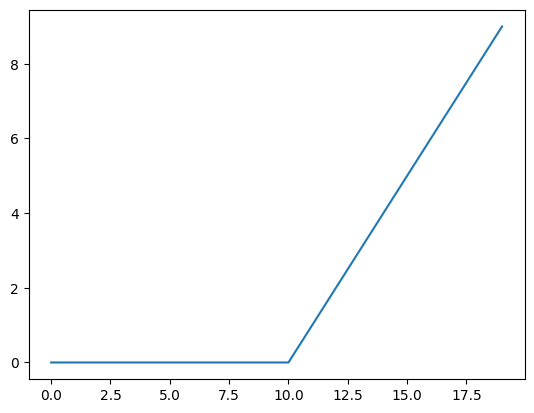

In [28]:
# Plot relu modified tensor
plt.plot(relu(A))

In [29]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

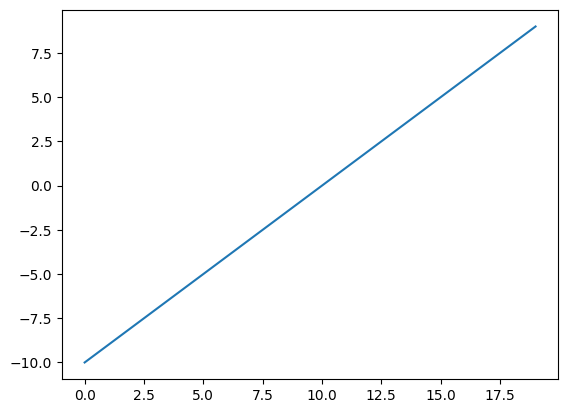

In [30]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [31]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluating and improving our classification

So far we have been training and testing on the same datatset....
However, in machine learning this is basically a sin.
So let's create a training and test dataset.

In [32]:
# Check how many examples we have 
len(X)

1000

In [33]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [34]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


25/25 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4938
Epoch 2/25
25/25 [==============================] - 0s 792us/step - loss: 0.6919 - accuracy: 0.5125
Epoch 3/25
25/25 [==============================] - 0s 792us/step - loss: 0.6897 - accuracy: 0.5188
Epoch 4/25
25/25 [==============================] - 0s 798us/step - loss: 0.6880 - accuracy: 0.5163
Epoch 5/25
25/25 [==============================] - 0s 792us/step - loss: 0.6868 - accuracy: 0.5225
Epoch 6/25
25/25 [==============================] - 0s 750us/step - loss: 0.6854 - accuracy: 0.5200
Epoch 7/25
25/25 [==============================] - 0s 792us/step - loss: 0.6826 - accuracy: 0.5325
Epoch 8/25
25/25 [==============================] - 0s 750us/step - loss: 0.6820 - accuracy: 0.5238
Epoch 9/25
25/25 [==============================] - 0s 750us/step - loss: 0.6815 - accuracy: 0.5475
Epoch 10/25
25/25 [==============================] - 0s 751us/step - loss: 0.6771 - accuracy: 0.5362
Epoch 11/25


In [35]:
# Evaluate the model on the test dataset
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 1ms/step - loss: 0.5342 - accuracy: 0.7400
Model loss on the test set: 0.534231424331665
Model accuracy on the test set: 74.00%


100% accuracy? Nice!

Now, when we started to create `model_8` we said it was going to be the same as `model_7` but you might've found that to be a little lie.

That's because we changed a few things:
* **The `activation` parameter** - We used strings (`"relu"` & `"sigmoid"`) instead of using library paths (`tf.keras.activations.relu`), in TensorFlow, they both offer the same functionality.
* **The `learning_rate` (also `lr`) parameter** - We increased the **learning rate** parameter in the [Adam optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) to `0.01` instead of `0.001` (an increase of 10x).
  * You can think of the learning rate as how quickly a model learns. The higher the learning rate, the faster the model's capacity to learn, however, there's such a thing as a *too high* learning rate, where a model tries to learn too fast and doesn't learn anything. We'll see a trick to find the ideal learning rate soon.
* **The number of epochs** - We lowered the number of epochs (using the `epochs` parameter) from 100 to 25 but our model still got an incredible result on both the training and test sets.
  * One of the reasons our model performed well in even less epochs (remember a single epoch is the model trying to learn patterns in the data by looking at it once, so 25 epochs means the model gets 25 chances) than before is because we increased the learning rate.

We know our model is performing well based on the evaluation metrics but let's see how it performs visually.


313/313 [==============================] - 0s 560us/step
doing binary classification
313/313 [==============================] - 0s 577us/step
doing binary classification


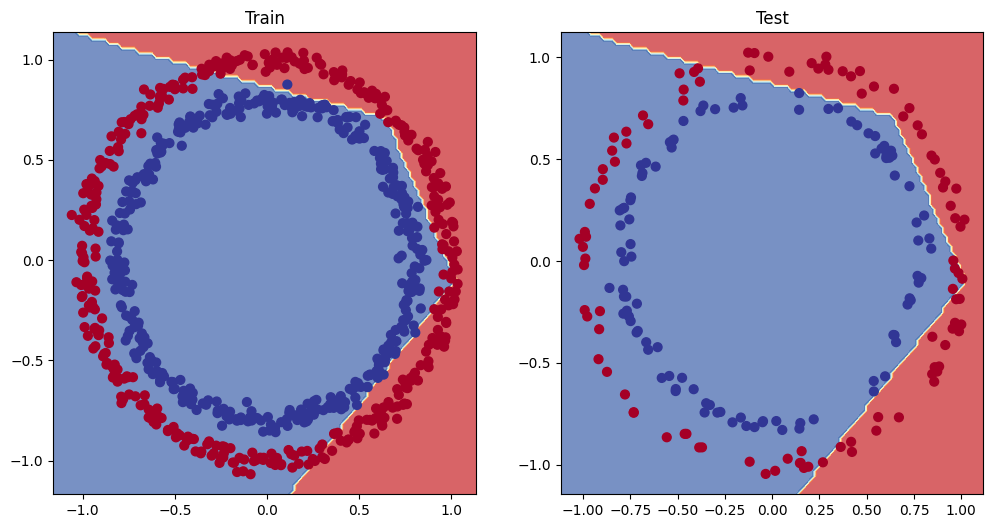

In [36]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### Plot the loss curves

In [37]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.698166,0.49375
1,0.691871,0.51250
2,0.689661,0.51875
3,0.687993,0.51625
4,0.686792,0.52250
5,0.685397,0.52000
6,0.682610,0.53250
7,0.681954,0.52375
8,0.681501,0.54750
9,0.677120,0.53625


Text(0.5, 1.0, 'model_8 loss curves')

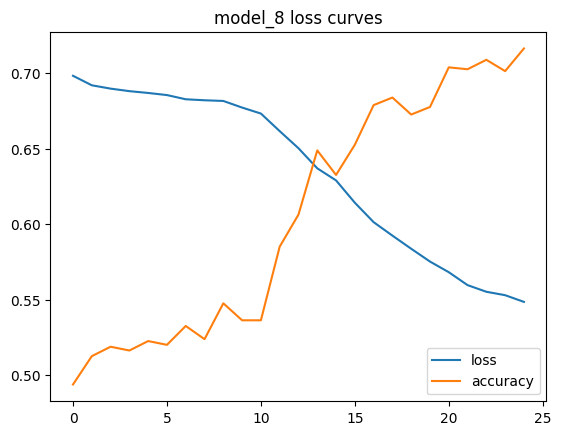

In [38]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves")

Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

### Finding the best learning rate

Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

We'll go through each with code, then explain what's going on.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [39]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 917us/step - loss: 0.7278 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 750us/step - loss: 0.7267 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 792us/step - loss: 0.7257 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 875us/step - loss: 0.7245 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 763us/step - loss: 0.7233 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 776us/step - loss: 0.7222 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 750us/step - loss: 0.7208 - accuracy: 0.5063 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 771us/step - loss: 0.7195 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: xlabel='epochs'>

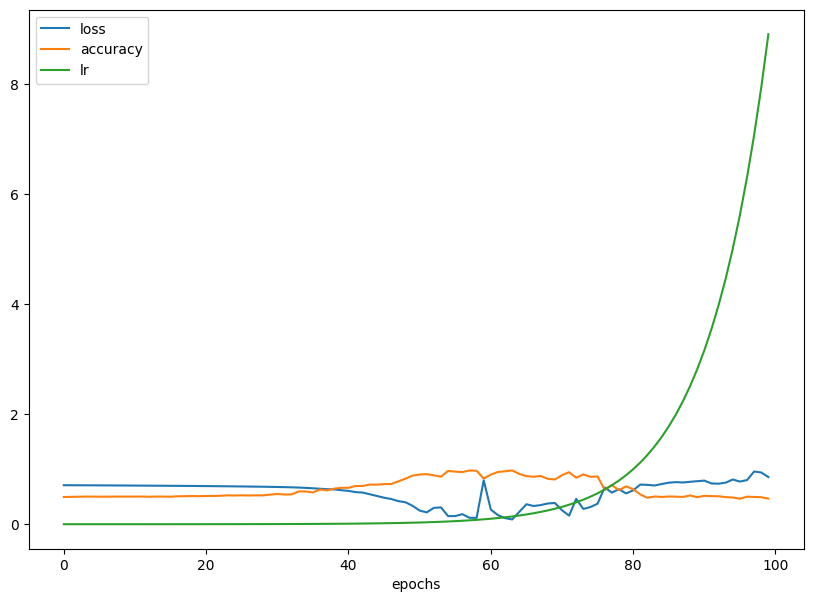

In [40]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

As you you see the learning rate exponentially increases as the number of epochs increases.

And you can see the model's accuracy goes up (and loss goes down) at a specific point when the learning rate slowly increases.

To figure out where this infliction point is, we can plot the loss versus the log-scale learning rate.

Text(0.5, 1.0, 'Learning rate vs. loss')

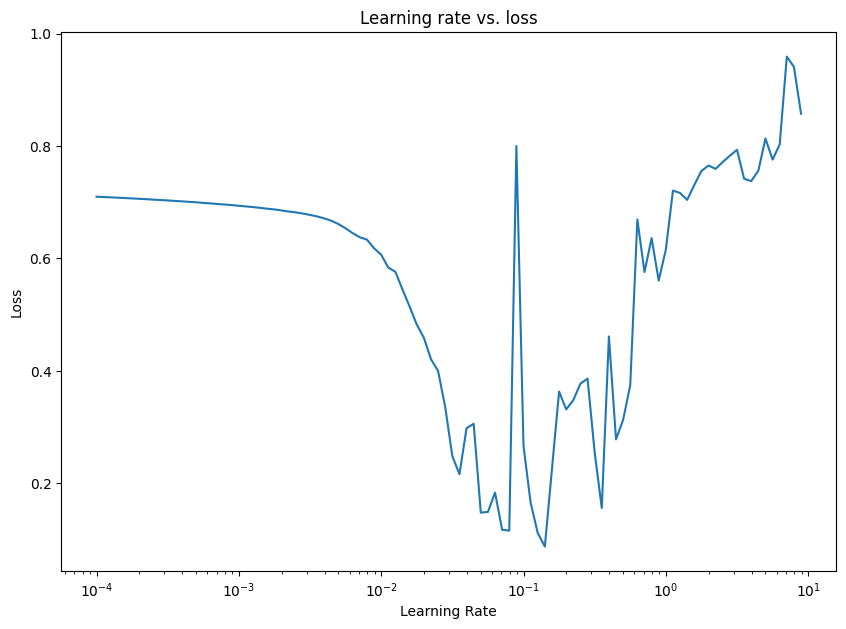

In [41]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [42]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Now we've estimated the ideal learning rate (we'll use `0.02`) for our model, let's refit it.

In [51]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 858us/step - loss: 0.6910 - accuracy: 0.5300
Epoch 2/20
25/25 [==============================] - 0s 822us/step - loss: 0.6826 - accuracy: 0.5575
Epoch 3/20
25/25 [==============================] - 0s 807us/step - loss: 0.6678 - accuracy: 0.6000
Epoch 4/20
25/25 [==============================] - 0s 796us/step - loss: 0.6323 - accuracy: 0.6938
Epoch 5/20
25/25 [==============================] - 0s 626us/step - loss: 0.5819 - accuracy: 0.7387
Epoch 6/20
25/25 [==============================] - 0s 778us/step - loss: 0.5178 - accuracy: 0.7950
Epoch 7/20
25/25 [==============================] - 0s 792us/step - loss: 0.4503 - accuracy: 0.8350
Epoch 8/20
25/25 [==============================] - 0s 734us/step - loss: 0.3808 - accuracy: 0.8725
Epoch 9/20
25/25 [==============================] - 0s 758us/step - loss: 0.3114 - accuracy: 0.9463
Epoch 10/20
25/25 [==============================] - 0s 805us/step - loss: 0.2459 - accuracy: 0.9850

Nice! With a little higher learning rate (0.02 instead of 0.01) we reach a higher accuracy than model_8 in less epochs (20 instead of 25).

In [52]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9800


[0.07525154948234558, 0.9800000190734863]

Let's see how the predictions look.

313/313 [==============================] - 0s 559us/step
doing binary classification
313/313 [==============================] - 0s 557us/step
doing binary classification


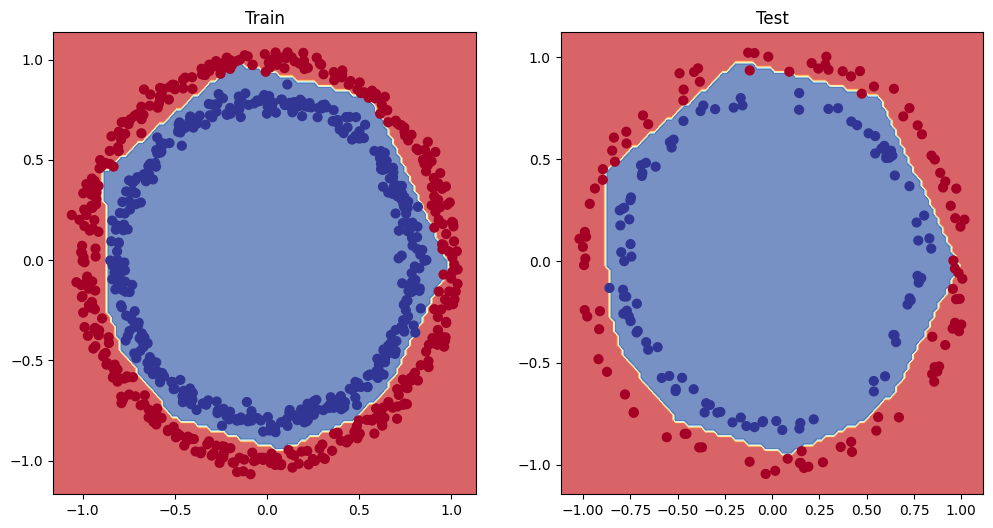

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

And as we can see, almost perfect again.

These are the kind of experiments you'll be running often when building your own models.

Start with default settings and see how they perform on your data.

And if they don't perform as well as you'd like, improve them.

Let's look at a few more ways to evaluate our classification models.

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [54]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1000us/step - loss: 0.0753 - accuracy: 0.9800
Model loss on test set: 0.07525154948234558
Model accuracy on test set: 98.00%


How about a confusion matrix?

![anatomy of a confusion matrix](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-anatomy-of-a-confusion-matrix.png)
*Anatomy of a confusion matrix (what we're going to be creating). Correct predictions appear down the diagonal (from top left to bottom right).*

We can make a confusion matrix using [Scikit-Learn's `confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) method.

In [55]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

Ahh, it seems our predictions aren't in the format they need to be.

Let's check them out.

In [56]:
# View the first 10 predictions
y_preds[:10]

array([[0.9657377 ],
       [0.9657377 ],
       [0.9657377 ],
       [0.9657377 ],
       [0.566151  ],
       [0.00642594],
       [0.9657377 ],
       [0.00298493],
       [0.9657377 ],
       [0.00132185]], dtype=float32)

What about our test labels?

In [57]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (`9.8526537e-01`), they're in a form called **prediction probabilities**.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how *likely* they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (`y_test`) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using [`tf.round()`](https://www.tensorflow.org/api_docs/python/tf/math/round).

In [58]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

Wonderful! Now we can use the `confusion_matrix` function.

In [59]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[97,  4],
       [ 0, 99]], dtype=int64)

Alright, we can see the highest numbers are down the diagonal (from top left to bottom right) so this a good sign, but the rest of the matrix doesn't really tell us much.

How about we make a function to make our confusion matrix a little more visual?

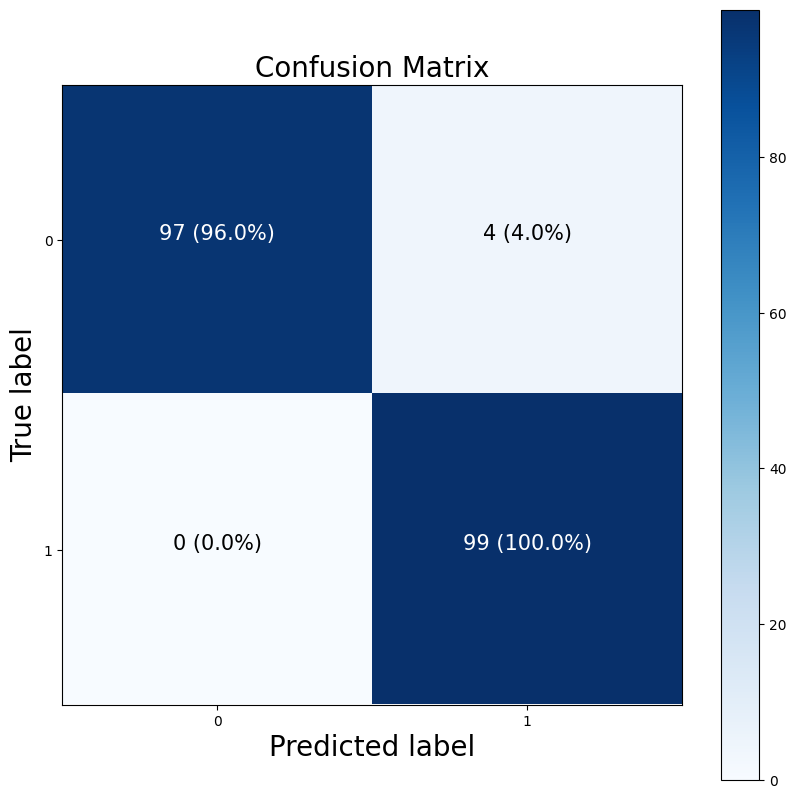

In [60]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

That looks much better. It seems our model has made almost perfect predictions on the test set except for four false positives (top right corner).

In [61]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1
